In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
! pip install openpyxl

In [64]:
df=pd.read_csv(r"C:\Users\user\Athletes.csv", encoding='latin-1')

In [65]:
df=df.drop(["Rank"],axis=1)

In [66]:
df.head()

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3


In [67]:
df.tail()

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
88,Ghana,0,0,1,1,77
89,Grenada,0,0,1,1,77
90,Kuwait,0,0,1,1,77
91,Republic of Moldova,0,0,1,1,77
92,Syrian Arab Republic,0,0,1,1,77


In [68]:
df.shape

(93, 6)

In [69]:
df.size

558

In [70]:
df.dtypes

Team/NOC         object
Gold              int64
Silver            int64
Bronze            int64
Total             int64
Rank by Total     int64
dtype: object

In [71]:
df.columns

Index(['Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Rank by Total'], dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team/NOC       93 non-null     object
 1   Gold           93 non-null     int64 
 2   Silver         93 non-null     int64 
 3   Bronze         93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank by Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.1+ KB


In [73]:
df.describe()

,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


In [74]:
df.isnull().sum()

Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [75]:
df.duplicated().sum()

0

In [76]:
df.skew()

Gold             3.517520
Silver           3.672700
Bronze           2.371108
Total            3.218625
Rank by Total   -0.064254
dtype: float64

In [77]:
df.corr()

,Gold,Silver,Bronze,Total,Rank by Total
Gold,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


In [78]:
df["Team/NOC"].value_counts()

Grenada                 1
Morocco                 1
Colombia                1
Turkmenistan            1
Kazakhstan              1
                       ..
Nigeria                 1
Armenia                 1
Portugal                1
Azerbaijan              1
Syrian Arab Republic    1
Name: Team/NOC, Length: 93, dtype: int64

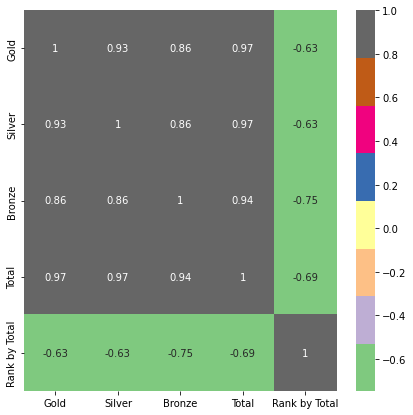

In [79]:
plt.figure(figsize=(7,7))
ax=sns.heatmap(df.corr(),annot=True,cmap="Accent")
plt.show()

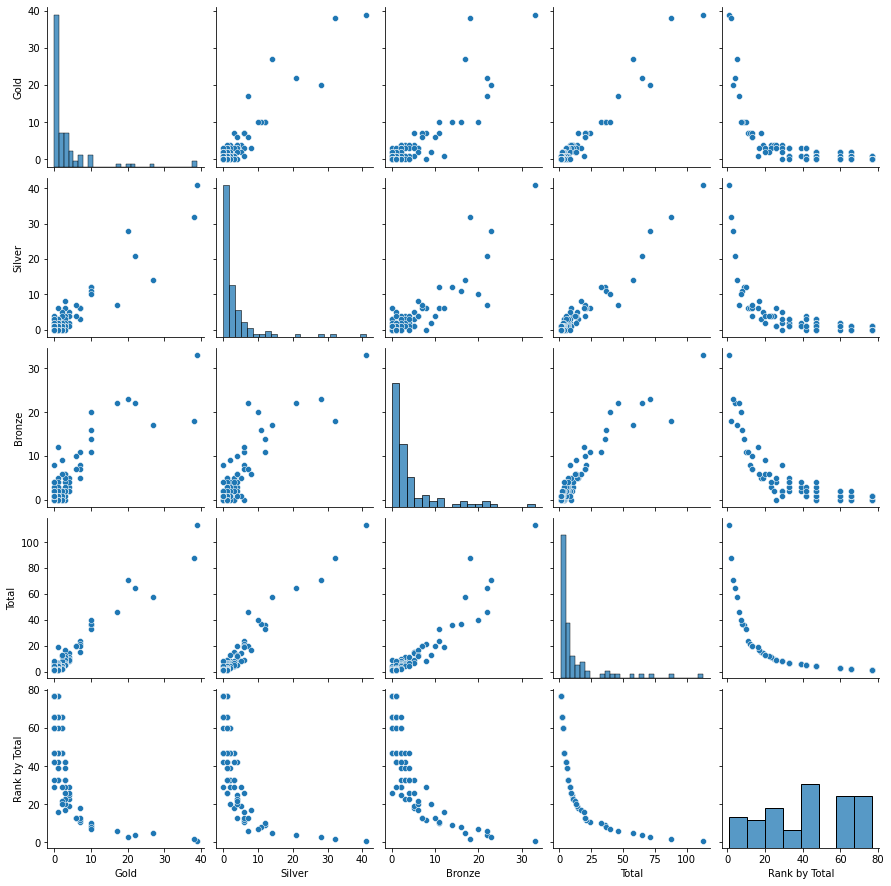

In [80]:
sns.pairplot(df)
plt.show()

In [81]:
fig=px.histogram(df,"Total",
                color="Team/NOC",
                title="<b>Average cases per state")
fig.add_vline(x=df["Total"].mean(),line_width=2,line_dash="dash",line_color="Black")
fig.show()

In [82]:
df[df["Gold"]>10]["Team/NOC"]
# countries with total medals greather than 10

0      United States of America
1    People's Republic of China
2                         Japan
3                 Great Britain
4                           ROC
5                     Australia
Name: Team/NOC, dtype: object

In [83]:
df[df["Gold"]>10]["Team/NOC"].count()

6

In [84]:
x=df[df["Gold"]>5]["Team/NOC"]
y=df[df["Gold"]>5]["Gold"]
data=go.Bar(x=x, y=y)
layout=go.Layout(title="simple bar chart")
fig=go.Figure(data=data, layout= layout)
fig.show()

In [85]:
df[df["Gold"]<5]["Team/NOC"]

16                  Poland
17          Czech Republic
18                   Kenya
19                  Norway
20                 Jamaica
              ...         
88                   Ghana
89                 Grenada
90                  Kuwait
91     Republic of Moldova
92    Syrian Arab Republic
Name: Team/NOC, Length: 77, dtype: object

In [86]:
df[df["Gold"]<5]["Team/NOC"].count()

77

In [87]:
y = df[df['Gold'] < 5]['Team/NOC']
x = df[df['Gold'] < 5]['Gold']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'Simple Bar Chart',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.show()

In [88]:
df1=df[["Team/NOC","Gold"]].sort_values(by=["Gold"],ascending=False).head()

In [89]:
df1

,Team/NOC,Gold
0,United States of America,39
1,People's Republic of China,38
2,Japan,27
3,Great Britain,22
4,ROC,20


In [90]:
y = df1['Team/NOC']
x = df1['Gold']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'Simple Bar Chart',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.update_traces(marker_color='red')
fig.show()

In [91]:
fig=px.histogram(df,"Silver",
                color="Team/NOC",
                title="<b>Average case in india</b>")
fig.add_vline(x=df['Silver'].mean(),line_width=2,line_dash="dash",line_color="Black")
fig.show()

In [92]:
df[df["Silver"]>5]["Team/NOC"]

0       United States of America
1     People's Republic of China
2                          Japan
3                  Great Britain
4                            ROC
5                      Australia
6                    Netherlands
7                         France
8                        Germany
9                          Italy
10                        Canada
11                        Brazil
12                   New Zealand
14                       Hungary
21                         Spain
22                        Sweden
43                       Ukraine
Name: Team/NOC, dtype: object

In [93]:
x=df[df["Silver"]>5]["Team/NOC"]
y=df[df["Silver"]>5]["Silver"]
data=go.Bar(x=x,y=y)
layout=go.Layout(title="Simple Bar Chart")
fig=go.Figure(data=data,layout=layout)
fig.show()

In [94]:
df[df["Silver"]<5]["Team/NOC"]

13                    Cuba
15       Republic of Korea
17          Czech Republic
18                   Kenya
19                  Norway
              ...         
88                   Ghana
89                 Grenada
90                  Kuwait
91     Republic of Moldova
92    Syrian Arab Republic
Name: Team/NOC, Length: 74, dtype: object

In [95]:
df[df["Silver"]<5]["Team/NOC"].count()

74

In [96]:
y=df[df["Silver"]<5]["Team/NOC"]
x=df[df["Silver"]<5]["Silver"]
data=go.Bar(x=x,y=y,orientation = 'h',textposition='auto',opacity=0.8)
layout=go.Layout(title="Simple Bar Graph",width=1000,height=1500)
fig=go.Figure(data=data,layout=layout)
fig.show()

In [97]:
df2=df[["Team/NOC","Silver"]].sort_values("Silver")
df2

,Team/NOC,Silver
92,Syrian Arab Republic,0
59,Fiji,0
58,Estonia,0
91,Republic of Moldova,0
62,Bermuda,0
...,...,...
2,Japan,14
3,Great Britain,21
4,ROC,28
1,People's Republic of China,32


In [98]:
y=df2["Team/NOC"]
x=df2["Silver"]
data=go.Bar(x=x,y=y,orientation="h",textposition="auto",opacity=0.8)
layout=go.Layout(title="Simple bar graph",width=1000,height=1500)
fig=go.Figure(data=data,layout=layout)
fig.update_traces(marker_color="magenta")
fig.show()

In [99]:
fig=px.histogram(df,"Bronze",
                color="Team/NOC",
                title="<b>Average cases per state</b>")
fig.add_vline(x=df["Bronze"].mean(),line_width=2,line_dash="dash",line_color="Black")
fig.show()

In [100]:
df[df["Bronze"]>5]["Team/NOC"]

0       United States of America
1     People's Republic of China
2                          Japan
3                  Great Britain
4                            ROC
5                      Australia
6                    Netherlands
7                         France
8                        Germany
9                          Italy
10                        Canada
11                        Brazil
12                   New Zealand
14                       Hungary
15             Republic of Korea
21                         Spain
23                   Switzerland
33                Chinese Taipei
34                        Turkey
43                       Ukraine
82                    Kazakhstan
Name: Team/NOC, dtype: object

In [101]:
df[df["Bronze"]>5]["Team/NOC"].count()

21

In [102]:
x = df[df['Bronze'] > 5]['Team/NOC']
y = df[df['Bronze'] > 5]['Bronze']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [103]:
df[df["Bronze"]<5]["Team/NOC"]

17          Czech Republic
18                   Kenya
19                  Norway
20                 Jamaica
22                  Sweden
              ...         
88                   Ghana
89                 Grenada
90                  Kuwait
91     Republic of Moldova
92    Syrian Arab Republic
Name: Team/NOC, Length: 68, dtype: object

In [104]:
df[df["Bronze"]<5]["Team/NOC"].count()

68

In [105]:
y=df[df["Bronze"]<5]["Team/NOC"]
x=df[df["Bronze"]<5]["Bronze"]
data=go.Bar(x=x,y=y,orientation="h",textposition="auto",opacity=0.8)
layout=go.Layout(title="Simple Bar Chart",width=1000,height=1500)
fig=go.Figure(data=data, layout=layout)
fig.show()

In [106]:
df3=df[["Team/NOC","Bronze"]].sort_values("Bronze")

In [107]:
df3

,Team/NOC,Bronze
46,Venezuela,0
41,Bahamas,0
42,Kosovo,0
45,Romania,0
51,South Africa,0
...,...,...
9,Italy,20
5,Australia,22
3,Great Britain,22
4,ROC,23


In [108]:
y=df3["Team/NOC"]
x=df3["Bronze"]
data=go.Bar(x=x,y=y,orientation="h",textposition="auto",opacity=0.8)
layout=go.Layout(title="Simple Bare Chart",width=1000,height=1500)
fig=go.Figure(data=data, layout=layout)
fig.update_traces(marker_color="Brown")
fig.show()

In [109]:
fig=px.histogram(df,"Total",
                  color="Team/NOC",
                  title="<b>Average Cases Per Country</b>")
fig.add_vline(x=df["Total"].mean(),line_width=2,line_color="Black",line_dash="dash")
fig.show()

In [110]:
df[df["Total"]>5]["Team/NOC"].count()

41

In [111]:
x=df[df["Total"]>5]["Team/NOC"]
y=df[df["Total"]>5]["Total"]
data=go.Bar(x=x,y=y)
layout=go.Layout(title="Simple Bar Chart")
fig=go.Figure(data=data,layout=layout)
fig.show()

In [112]:
df[df["Total"]>5]["Team/NOC"]

0       United States of America
1     People's Republic of China
2                          Japan
3                  Great Britain
4                            ROC
5                      Australia
6                    Netherlands
7                         France
8                        Germany
9                          Italy
10                        Canada
11                        Brazil
12                   New Zealand
13                          Cuba
14                       Hungary
15             Republic of Korea
16                        Poland
17                Czech Republic
18                         Kenya
19                        Norway
20                       Jamaica
21                         Spain
22                        Sweden
23                   Switzerland
24                       Denmark
25                       Croatia
26      Islamic Republic of Iran
27                        Serbia
28                       Belgium
29                      Bulgaria
32        

In [113]:
df[df["Total"]>5]["Team/NOC"].count()

41

In [114]:
y=df[df["Total"]>5]["Team/NOC"]
x=df[df["Total"]>5]["Total"]
data=go.Bar(x=x,y=y,orientation="h",opacity=0.8,textposition="auto")
layout=go.Layout(title="Simple Bar Chart",width=1000,height=1500)
fig=go.Figure(data=data,layout=layout)
fig.show()

In [115]:
df4=df[["Total","Team/NOC"]].sort_values("Total")

In [116]:
df4

,Total,Team/NOC
92,1,Syrian Arab Republic
62,1,Bermuda
76,1,Bahrain
77,1,Saudi Arabia
78,1,Lithuania
...,...,...
2,58,Japan
3,65,Great Britain
4,71,ROC
1,88,People's Republic of China


In [117]:
y=df4["Team/NOC"]
x=df4["Total"]
data=go.Bar(x=x,y=y,orientation="h",textposition="auto",opacity=0.8)
layout=go.Layout(title="Simple Bar Chart",width=1000,height=1500)
fig=go.Figure(data=data,layout=layout)
fig.update_traces(marker_color="turquoise")
fig.show()

In [118]:
a=[]
for i in df1["Team/NOC"].tail(5):
    a.append(i)
df1.tail()

,Team/NOC,Gold
0,United States of America,39
1,People's Republic of China,38
2,Japan,27
3,Great Britain,22
4,ROC,20


In [119]:
for i in df2["Team/NOC"].tail(5):
    a.append(i)
df2.tail()

,Team/NOC,Silver
2,Japan,14
3,Great Britain,21
4,ROC,28
1,People's Republic of China,32
0,United States of America,41


In [120]:
for i in df3["Team/NOC"].tail(5):
    a.append(i)
df3.tail()

,Team/NOC,Bronze
9,Italy,20
5,Australia,22
3,Great Britain,22
4,ROC,23
0,United States of America,33


In [121]:
for i in df4["Team/NOC"].tail(5):
    a.append(i)
df4.tail()

,Total,Team/NOC
2,58,Japan
3,65,Great Britain
4,71,ROC
1,88,People's Republic of China
0,113,United States of America


In [122]:
len(a)

20

In [123]:
# removing repeated countries
c=[]
for i in a:
    if i not in c:
        c.append(i)
print (c)

['United States of America', "People's Republic of China", 'Japan', 'Great Britain', 'ROC', 'Italy', 'Australia']


In [124]:
v=df["Team/NOC"].index.values
v

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92], dtype=int64)

In [125]:
m=[]
for i in range(len(v)):
    if df["Team/NOC"][i] in c:
        m.append(v[i])
print(m)

[0, 1, 2, 3, 4, 5, 9]


In [126]:
df8=df.loc[m]
df8

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6
9,Italy,10,10,20,40,7


In [127]:
x=df8["Team/NOC"]
y1=df8["Gold"]
y2=df8["Silver"]
y3=df8["Bronze"]
y4=df8["Total"]
trace1=go.Bar(x=x,y=y1,marker={"color": "#FFB300"},name="Gold")
trace2=go.Bar(x=x,y=y2,marker={"color": "#F7DC6F"},name="Silver")
trace3=go.Bar(x=x,y=y3,marker={"color": "#FF9800"},name="Bronze")
trace4=go.Bar(x=x,y=y4,marker={"color": "#7CB342"},name="Total")
layout=go.Layout(title="Grouped Bar Chart",width=1000,height=1500)
data=[trace1,trace2,trace3,trace4]
fig=go.Figure(data=data,layout=layout)
fig.show()

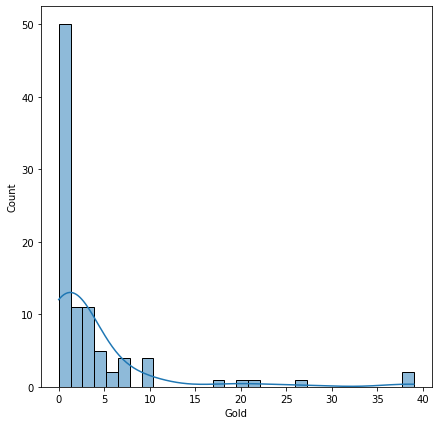

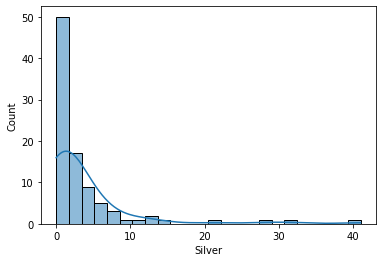

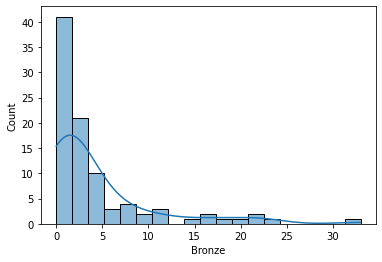

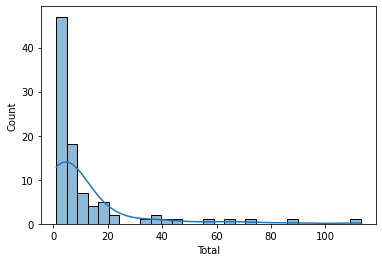

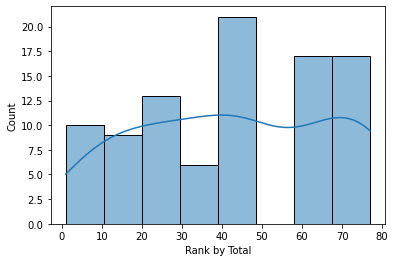

In [128]:
plt.figure(figsize=(7,7))
x=df.drop(["Team/NOC"],axis=1)
for i in x.columns:
    sns.histplot(x[i],kde=True)
    plt.show()

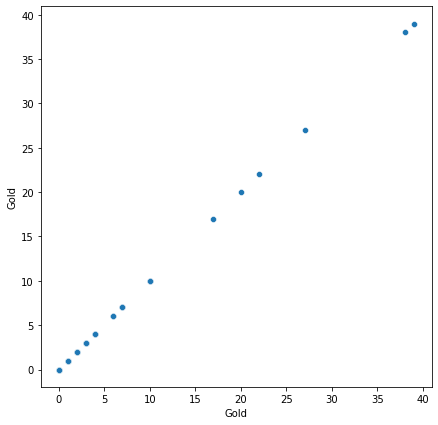

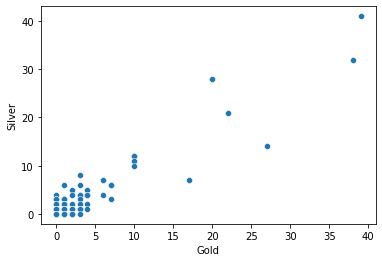

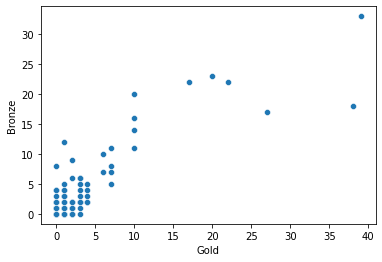

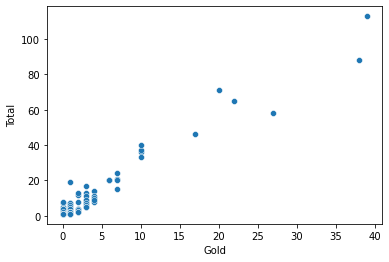

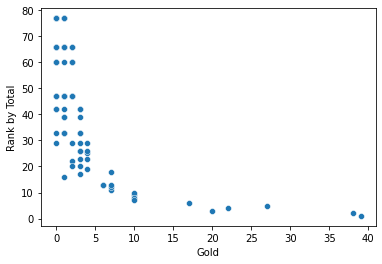

In [129]:
plt.figure(figsize=(7,7))
x=df.drop(["Team/NOC"],axis=1)
for i in x.columns:
    sns.scatterplot(x="Gold",y=x[i],data=df)
    plt.show()

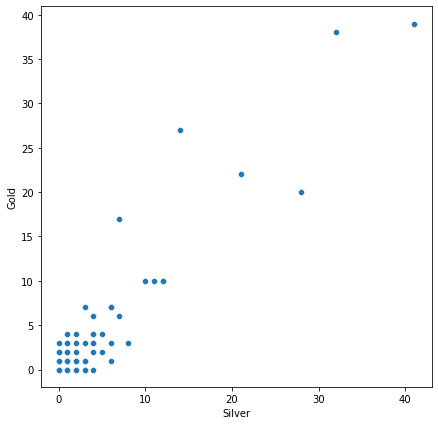

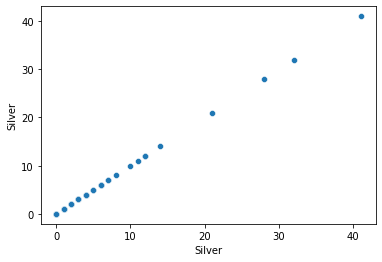

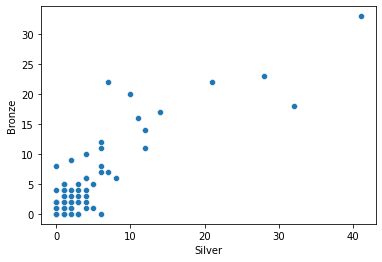

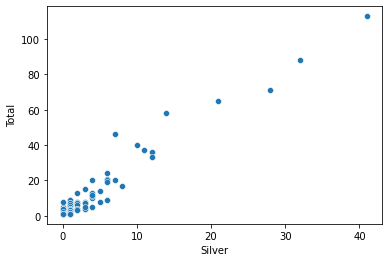

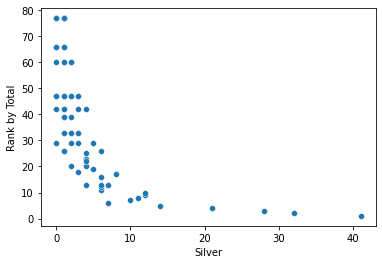

In [130]:
plt.figure(figsize=(7,7))
x=df.drop(["Team/NOC"],axis=1)
for i in x.columns:
    sns.scatterplot(x="Silver",y=x[i],data=df)
    plt.show()

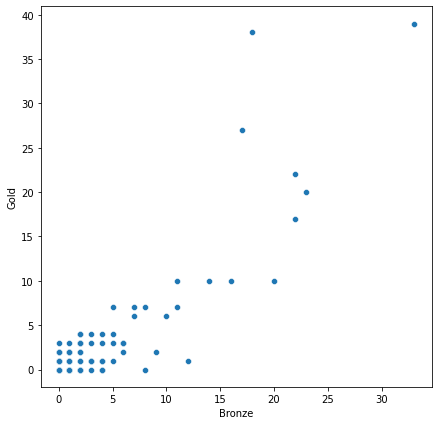

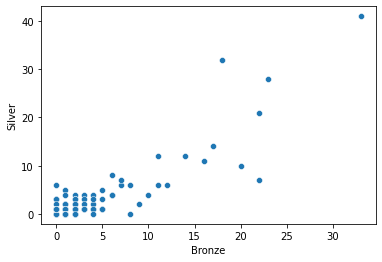

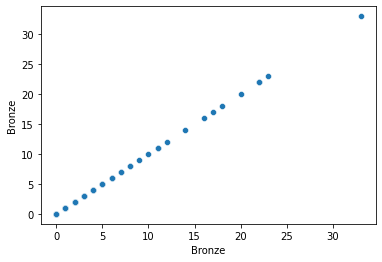

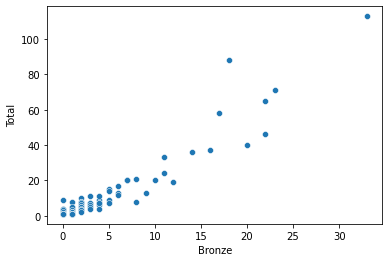

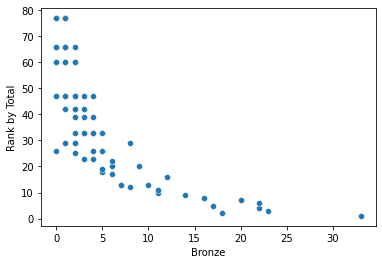

In [131]:
plt.figure(figsize=(7,7))
x=df.drop(["Team/NOC"],axis=1)
for i in x.columns:
    sns.scatterplot(x="Bronze",y=x[i],data=df)
    plt.show()

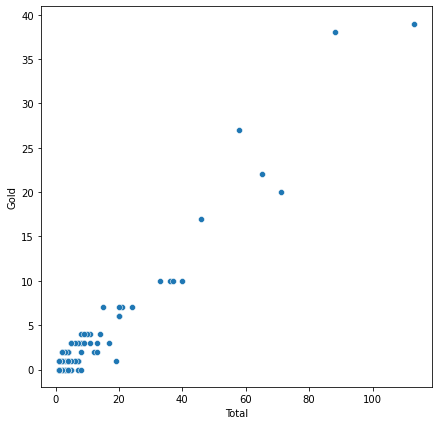

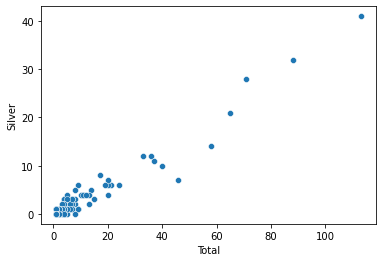

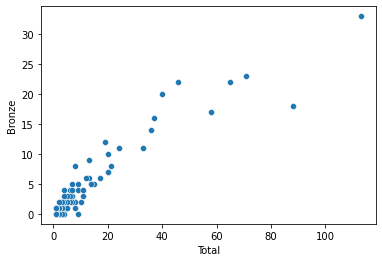

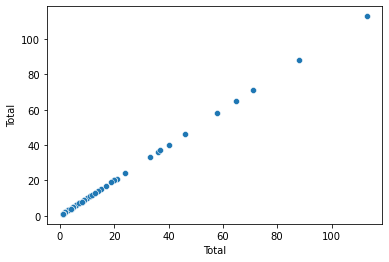

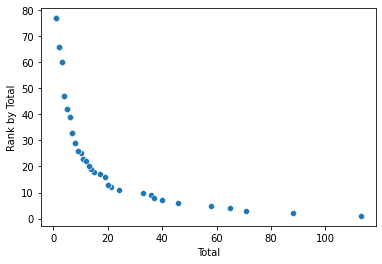

In [132]:
plt.figure(figsize=(7,7))
x=df.drop(["Team/NOC"],axis=1)
for i in x.columns:
    sns.scatterplot(x="Total",y=x[i],data=df)
    plt.show()

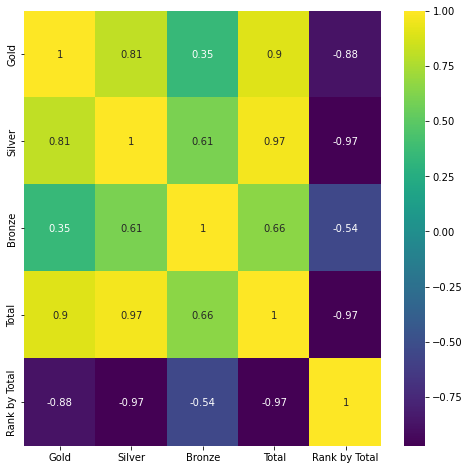

In [133]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(df8.corr(),annot=True,cmap="viridis")
plt.show()

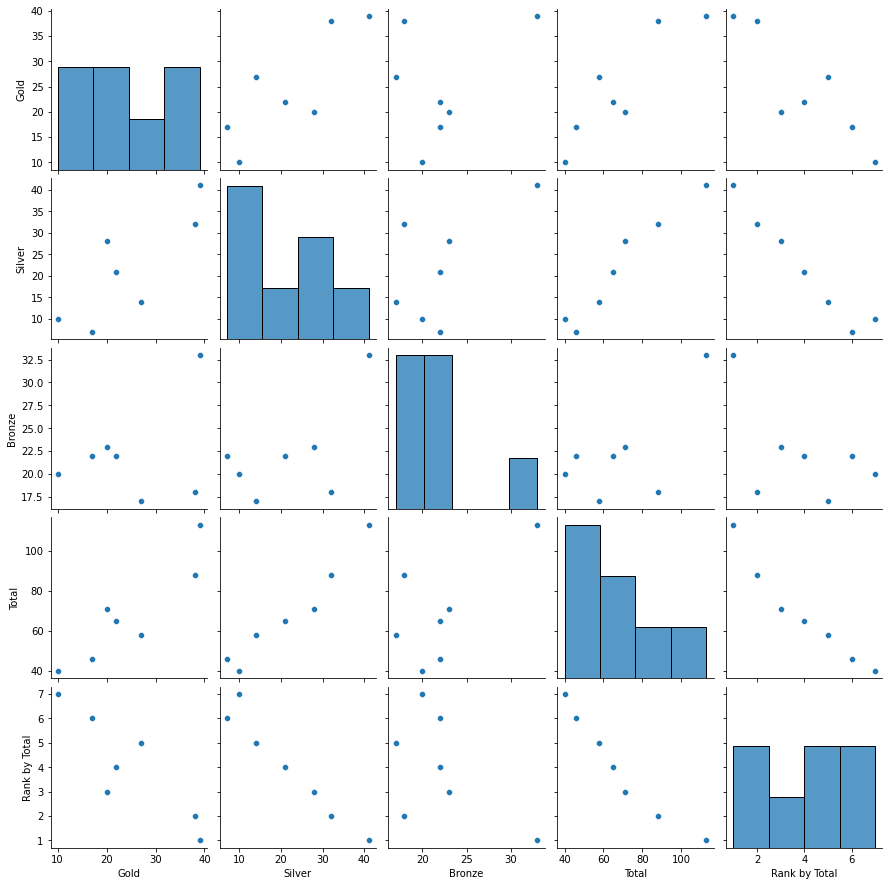

In [134]:
sns.pairplot(df8)
plt.show()

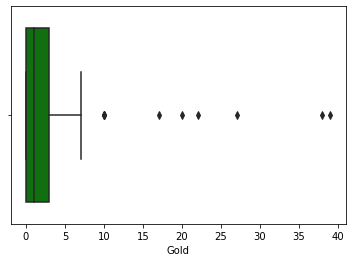

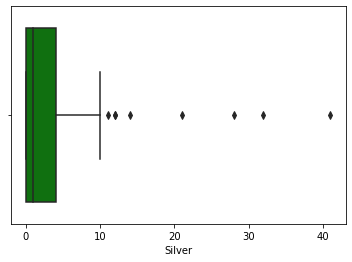

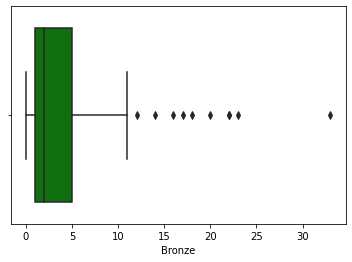

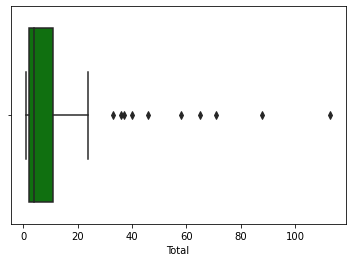

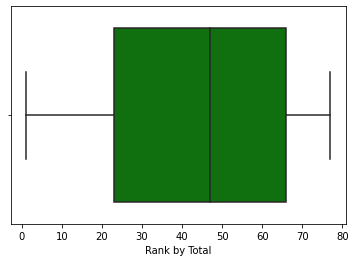

In [135]:
x=df.drop(["Team/NOC"],axis=1)
for i in x.columns:
    sns.boxplot(x=i,data=x,color="Green")
    plt.xlabel(i)
    plt.show()

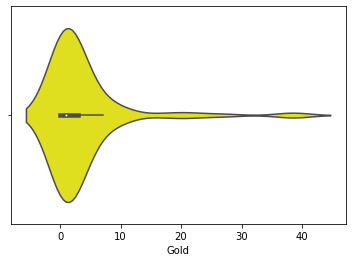

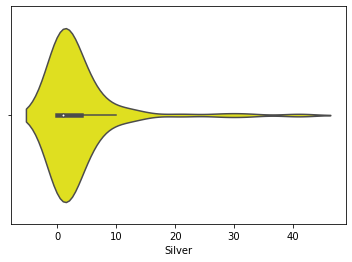

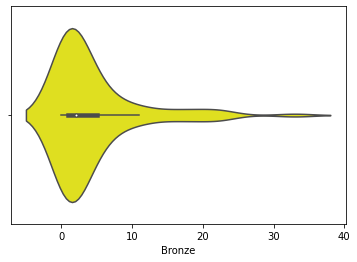

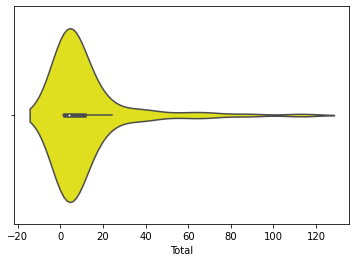

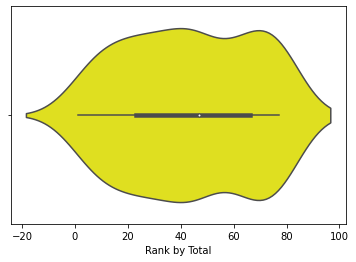

In [136]:
x=df.drop(["Team/NOC"],axis=1)
for i in x.columns:
    sns.violinplot(x=i,data=x,color="yellow")
    plt.xlabel(i)
    plt.show()

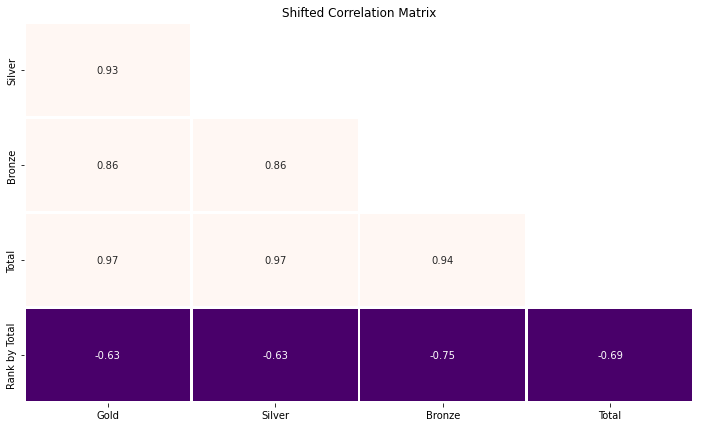

In [147]:
def corrMat(df,id=False):
    corr_mat=df.corr().round(2)
    f,ax=plt.subplots(figsize=(12,7))
    mask=np.triu(np.ones_like(corr_mat,dtype=bool))
    mask=mask[1:,:-1]
    corr=corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0,cmap="RdPu_r",square=False,lw=2,annot=True,cbar=False)
    ax.set_title("Shifted Correlation Matrix")
corrMat(df)

In [153]:
for i in range (len(df["Team/NOC"])):
    tickets=df.iloc[i]
    status=["Gold","Bronze","Silver","Total"]
    colors = ['#8BC34A','#D4E157','#FFB300','#FF7043']
    data=go.Pie(values=tickets,
               labels=status,
               marker=dict(colors=colors),
               textinfo="label+value+percent"
               )
    layout=go.Layout(title=dict(text=df["Team/NOC"][i],x=0.46,y=0.95,font_size=20),
                    width=800,
                    height=650)
    fig=go.Figure(data=data,layout=layout)
    fig.show()